In [9]:
import sys 
#sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("../..") # add standard 's modules
# sys.path.append('/home/hbkoziel/pyfesom/codes/modules')
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')

import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time
import pandas as pd
import xarray as xr

sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

In [10]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
runid	= 'Arc12'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=False)        # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative
input_directory  = '/scratch/usr/hbkoziel/'+runid+'/netcdf_monthly/'

first_year = 2014
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

months =np.linspace(0,11,12).astype(int)

ind_all = np.load('index_all.npy')

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [11]:
# V2 -> u.d(N) -> MEAN
# remote horizontal effect

tracername = 'HADVv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
hadv2    = f1.variables['ADVH'][:,:].mean(axis=0)*30

hadv2_u    = f1.variables['ADVU'][:,:].mean(axis=0)*30
hadv2_v    = f1.variables['ADVV'][:,:].mean(axis=0)*30
#hadv2 = hadv2 * 30
print np.nanmax(hadv2)
print np.nanmin(hadv2)
print np.nanmean(hadv2)

# remote vertical effect

tracername = 'VADVv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
vadv2    = f1.variables['VADV'][:,:].mean(axis=0)*30
#vadv2 = vadv2 * 30# * 24 *3600
print np.nanmax(vadv2)
print np.nanmin(vadv2)
print np.nanmean(vadv2)

# V2 -> u' . d(N') -> EDDY
# eddy advection

tracername = 'VEDYv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
vedyv2    = f1.variables['VEDY'][:].mean(axis=0)*30
#vedyv2 = vedyv2 * 30# * 3600 * 30
print np.nanmax(vedyv2)
print np.nanmin(vedyv2)
print np.nanmean(vedyv2)

2333.6885
-6866.0005
-0.018898953
43.487175
-58.325775
-0.04215178
138.37253
-334.30313
0.067661054


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less_equal
  # This is added back by InteractiveShellApp.init_path()
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater_equal
  if sys.path[0] == '':


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


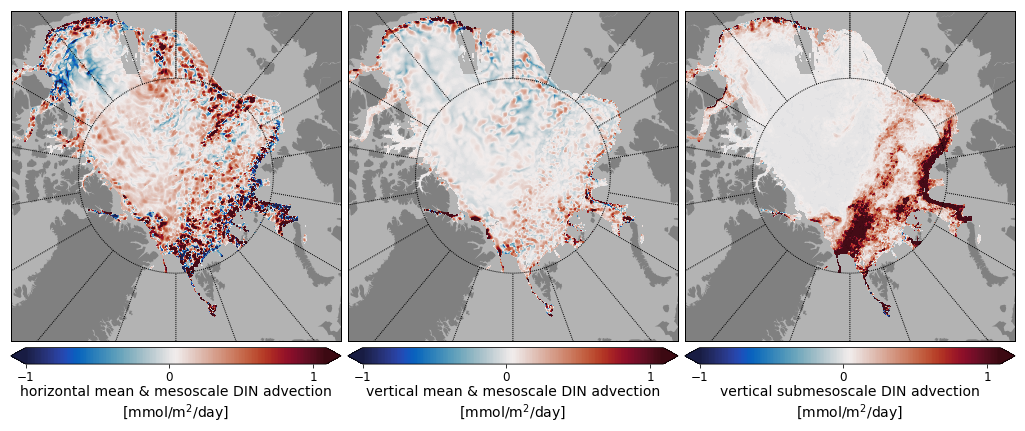

In [12]:
fig = plt.figure(figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=0.02,hspace=0.02)
contours = np.arange(-1, 1.1, .01)

ax1      = fig.add_subplot(131)
#hadv[ind_all] = np.nan
data = np.empty(np.shape(hadv2))
data[:] = np.nan
data[ind_all]=hadv2[ind_all]
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'horizontal mean & mesoscale DIN advection'+'\n'+'[mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=[-1, 0, 1])
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

ax2      = fig.add_subplot(132)
data = np.empty(np.shape(vadv2))
data[:] = np.nan
data[ind_all]=vadv2[ind_all]
#vadv[mesh.topo < 100] = np.nan
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'vertical mean & mesoscale DIN advection'+'\n'+'[mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=[-1, 0, 1])
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

ax3      = fig.add_subplot(133)
#hadv[ind_all] = np.nan
data = np.empty(np.shape(vedyv2))
data[:] = np.nan
data[ind_all]=vedyv2[ind_all]
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'vertical submesoscale DIN advection'+'\n'+'[mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=[-1, 0, 1])
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.savefig('maps.png', dpi = 300, bbox_inches='tight') 

/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less_equal
  # This is added back by InteractiveShellApp.init_path()
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater_equal
  if sys.path[0] == '':


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


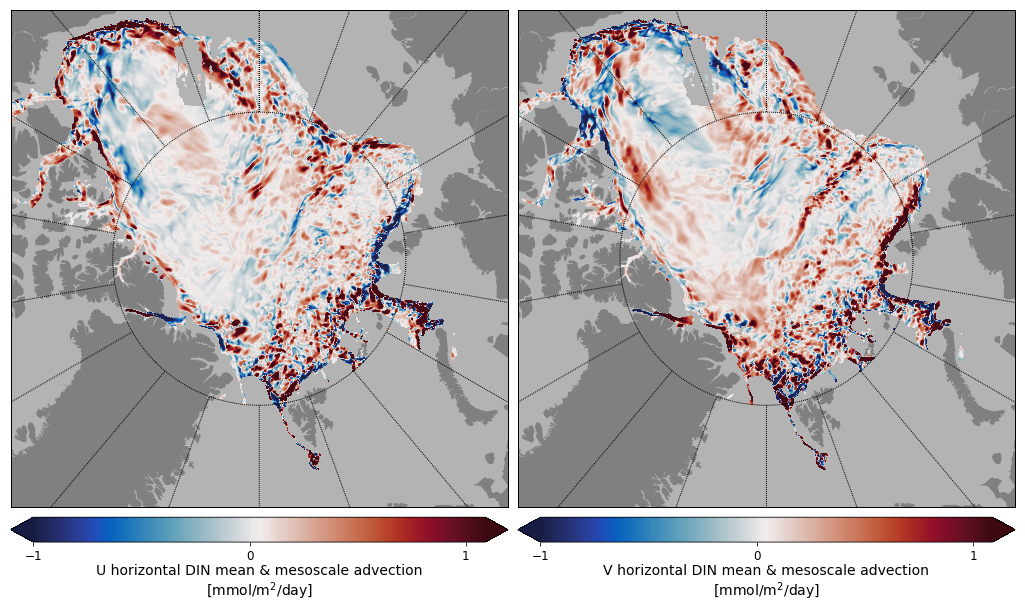

In [13]:
fig = plt.figure(figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=0.02,hspace=0.02)
contours = np.arange(-1, 1.1, .01)

ax1      = fig.add_subplot(121)
#hadv[ind_all] = np.nan
data = np.empty(np.shape(hadv2_u))
data[:] = np.nan
data[ind_all]=hadv2_u[ind_all]
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'U horizontal DIN mean & mesoscale advection'+'\n'+'[mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=[-1, 0, 1])
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

ax2      = fig.add_subplot(122)
data = np.empty(np.shape(hadv2_u))
data[:] = np.nan
data[ind_all]=hadv2_v[ind_all]
#vadv[mesh.topo < 100] = np.nan
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'V horizontal DIN mean & mesoscale advection'+'\n'+'[mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=[-1, 0, 1])
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.savefig('maps_hadvuv.png', dpi = 300, bbox_inches='tight') 

In [14]:
tracername = 'BFACT'
ncfile       = input_directory+tracername+'.1995.monthly.nc'
f1           = Dataset(ncfile, 'r')
bfact_mean    = f1.variables['BFACT'][:,:].mean(axis=0) + f1.variables['BFACT'][:2,:].mean(axis=0)
bfact_max    = f1.variables['BFACT'][:,:].max(axis=0)
bfact_min    = f1.variables['BFACT'][:,:].min(axis=0)
bfact_std    = f1.variables['BFACT'][:,:].std(axis=0)
bfact_diff    = np.diff(f1.variables['BFACT'][:,:],axis=0)
bfact_int = np.sum(bfact_diff, axis=0) + np.sum(bfact_diff[:2,:], axis=0)

data_bfact = np.empty(np.shape(bfact_int))
data_bfact[:] = np.nan
data_bfact[ind_all]=-bfact_std[ind_all]

data_bfactint = np.empty(np.shape(bfact_int))
data_bfactint[:] = np.nan
data_bfactint[ind_all]=-bfact_int[ind_all]

vmix = np.load('VMIX2014_Arc12_yearly.npy')
data_vmix = np.empty(np.shape(vmix))
data_vmix[:] = np.nan
data_vmix[ind_all]=vmix[ind_all]

phy = vadv2 + hadv2  + vedyv2
diff =  -bfact_std + vmix - phy

data_diff = np.empty(np.shape(diff))
data_diff[:] = np.nan
data_diff[ind_all]=diff[ind_all]

For depth 0 model level -0.0 will be used
For depth 0 model level -0.0 will be used
For depth 0 model level -0.0 will be used
For depth 0 model level -0.0 will be used


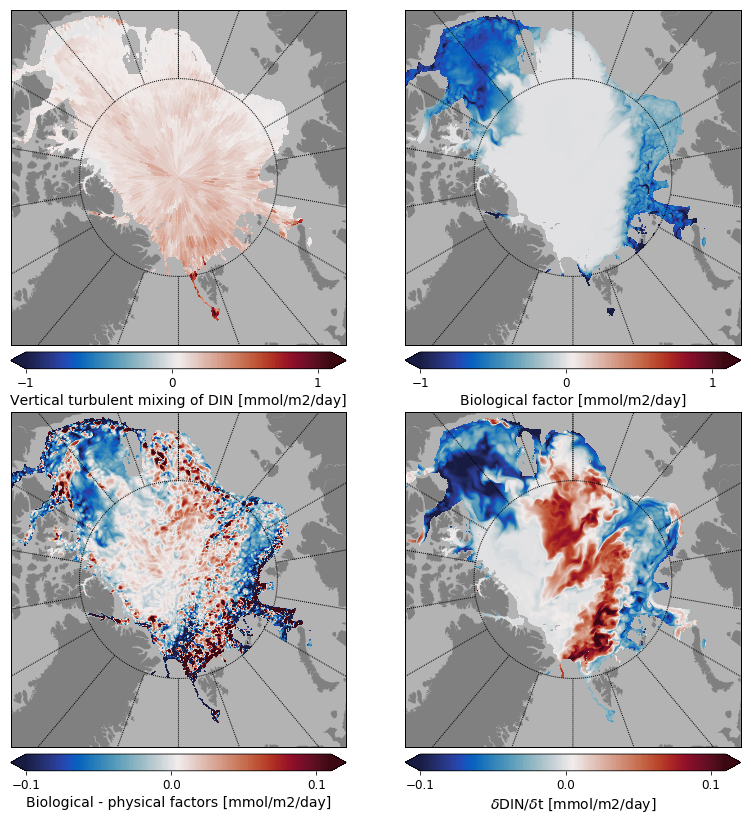

In [19]:
fig = plt.figure(figsize=(14, 14), facecolor='w', edgecolor='k', constrained_layout=False)
fig.subplots_adjust(wspace=0.02,hspace=0.12)
contours = np.arange(-1, 1.1, .01)

ax1      = fig.add_subplot(221)
data, elem_no_nan = pf.get_data(data_vmix,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label1 = 'Vertical turbulent mixing of DIN [mmol/m2/day]'
cbar1=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=[-1, 0, 1])
cbar1.set_label(label1, fontsize=14)
cbar1.ax.tick_params(labelsize=12)

ax2      = fig.add_subplot(222)
data, elem_no_nan = pf.get_data(data_bfact,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label2 = 'Biological factor [mmol/m2/day]'
cbar2=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=[-1, 0, 1])
cbar2.set_label(label2, fontsize=14)
cbar2.ax.tick_params(labelsize=12)

contours = np.arange(-.1, .11, .001)

ax3      = fig.add_subplot(223)
data, elem_no_nan = pf.get_data(data_diff/10,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label3 = 'Biological - physical factors [mmol/m2/day]'
cbar3=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=[-.1, 0, .1])
cbar3.set_label(label3, fontsize=14)
cbar3.ax.tick_params(labelsize=12)

ax4      = fig.add_subplot(224)
data, elem_no_nan = pf.get_data(data_bfactint,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label4 = '${\delta}$DIN/${\delta}$t [mmol/m2/day]'
cbar4=m.colorbar(im,"bottom", size="5%", pad="2%", ticks=[-.1, 0, .1])
cbar4.set_label(label4, fontsize=14)
cbar4.ax.tick_params(labelsize=12)

plt.savefig('maps_balance.png', dpi = 300, bbox_inches='tight') 